Questions to be solved : 

* Is Age is normally distributed or not
* Is Income is normally distributed or not
* Any missing value in the data
* Any outliers in Age and Income Columns
* Chi-Square Test between all categorical column and PL column
* One way ANOVA on Region and Income
* T-test between gender, marriage, children, car with income column
* Build the classification model to predict personal loan


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('D:\Term 3\Banking analytics\Case Studies\Case_study_1\Casestudy_1_Descriptive Stats.csv')
data.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pl
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [3]:
data['children_yn'] = data['children'].map(lambda x:'NO' if x == 0 else 'YES')
data.head()


,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pl,children_yn
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO,YES
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO,YES
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO,NO


In [4]:
data.shape

(330, 13)

## Is Age is normally distributed or not

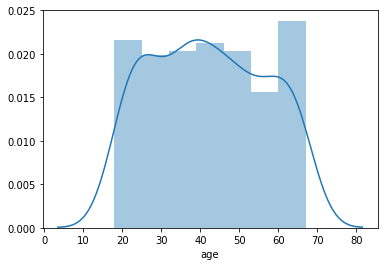

In [5]:
sns.distplot(data['age'])

In [6]:
from scipy.stats import shapiro
### H0 : age is following normal distribution
### H1 : age doesn't following normal distribution

shapiro(data['age'])

# As pvalue(0.0) is less than alhpa value(0.05), so data is not normal_distribution

(0.9519780278205872, 6.6147682886708026e-09)

## Is Income is normally distributed or not

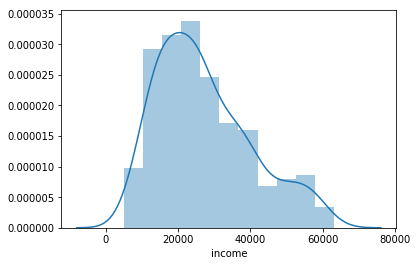

In [7]:
sns.distplot(data['income'])

In [8]:
### H0 : income is following normal distribution
### H1 : income doesn't following normal distribution

shapiro(data['income'])

# As pvalue(0.0) is less than alhpa value(0.05), so data is not normal_distribution

(0.9428609013557434, 5.541547221099563e-10)

In [9]:
#* Any missing value in the data
data.isnull().sum()

id             0
age            0
sex            0
region         0
income         0
married        0
children       0
car            0
save_act       0
current_act    0
mortgage       0
pl             0
children_yn    0
dtype: int64

## Any outliers in Age and Income Columns

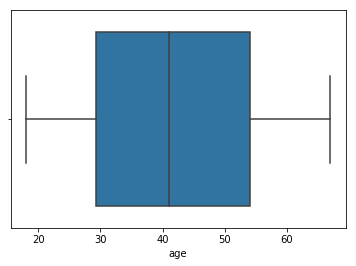

In [10]:

sns.boxplot(data['age'])

no outliers in age column

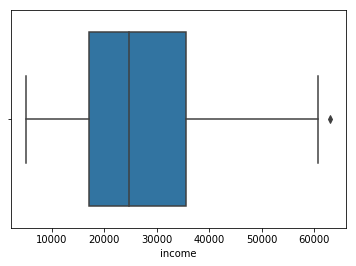

In [11]:
sns.boxplot(data['income'])

outlier observed in income column

## Chi-Square Test between all categorical column and PL column¶

In [12]:
from scipy.stats import chi2_contingency

H0 : marriage status does not depend on having personal loan

H1 : marriage status does depend having personal loan

In [13]:
tab = pd.crosstab(index=data['pl'],columns=data['married'])
tab

married,NO,YES
pl,,
NO,53,129
YES,63,85


In [14]:
# Lets test the hypo.
chi2_contingency(tab)

(5.898041621988204,
 0.015157729377672154,
 1,
 array([[ 63.97575758, 118.02424242],
        [ 52.02424242,  95.97575758]]))

As p-value - 0.0151, chi-stats - 5.8980, degree-freedom - (2-1)*(2-1) = 1

Here, p-value is lesser than alpha(0.05) so we will reject the null hypotheis

So, marriage status does depend having personal loan

## Does sex status depends on having personal loan??

H0 : sex status does not depend on having personal loan

H1 : sex status does depend having personal loan

In [15]:
# Convert the columns of sex and PL column into cross table

tab = pd.crosstab(index=data['pl'],columns=data['sex'])
tab

sex,FEMALE,MALE
pl,,
NO,98,84
YES,62,86


In [16]:
# Lets test the hypo.
chi2_contingency(tab)

(4.203725620315687, 0.040335270903050835, 1, array([[88.24242424, 93.75757576],
        [71.75757576, 76.24242424]]))

As p-value - 0.0403, chi-stats - 4.2037, degree-freedom - (2-1)*(2-1) = 1

Here, p-value is lesser than alpha(0.05) so we will reject the null hypotheis

So, sex status does depend having personal loan

## Does region status depends on having personal loan??¶
H0 : region status does not depend on having personal loan

H1 : region status does depend having personal loan

In [17]:
# Convert the columns of region and PL column into cross table

tab = pd.crosstab(index=data['pl'],columns=data['region'])
tab

region,INNER_CITY,RURAL,SUBURBAN,TOWN
pl,,,,
NO,85,26,14,57
YES,70,28,11,39


In [18]:
# Lets test the hypo.
chi2_contingency(tab)

(1.776514811293037,
 0.6200588623676881,
 3,
 array([[85.48484848, 29.78181818, 13.78787879, 52.94545455],
        [69.51515152, 24.21818182, 11.21212121, 43.05454545]]))

As p-value - 0.62, chi-stats - 1.7765, degree-freedom - (2-1)*(4-1) = 3

Here, p-value is greater than alpha(0.05) so we will accept the null hypotheis

So, region status does not depend having personal loan

## Does children status depends on having personal loan??
H0 : children status does not depend on having personal loan

H1 : children status does depend having personal loan

In [19]:
# Convert the columns of children and PL column into cross table

tab = pd.crosstab(index=data['pl'],columns=data['children_yn'])
tab


children_yn,NO,YES
pl,,
NO,90,92
YES,51,97


As p-value - 0.0086, chi-stats - 6.8959, degree-freedom - (2-1)*(2-1) = 3

Here, p-value is lesser than alpha(0.05) so we will reject the null hypotheis

So, children status does depend having personal loan

## Does car status depends on having personal loan??
H0 : car status does not depend on having personal loan

H1 : car status does depend having personal loan

In [20]:
# Convert the columns of car and PL column into cross table

tab = pd.crosstab(index=data['pl'],columns=data['car'])
tab

car,NO,YES
pl,,
NO,95,87
YES,79,69


In [21]:
# Lets test the hypo.
chi2_contingency(tab)

(0.010565495064832148,
 0.9181307579498735,
 1,
 array([[95.96363636, 86.03636364],
        [78.03636364, 69.96363636]]))

As p-value - 0.9181, chi-stats - 0.0105, degree-freedom - (2-1)*(2-1) = 3

Here, p-value is greater than alpha(0.05) so we will accept the null hypotheis

So, car status does not depend having personal loan

## Does save_act status depends on having personal loan??
H0 : save_act status does not depend on having personal loan

H1 : save_act status does depend having personal loan

In [22]:
# Convert the columns of save_act and PL column into cross table

tab = pd.crosstab(index=data['pl'],columns=data['save_act'])
tab

save_act,NO,YES
pl,,
NO,56,126
YES,47,101


In [23]:
# Lets test the hypo.
chi2_contingency(tab)

(0.005345157445153202,
 0.9417181196452988,
 1,
 array([[ 56.80606061, 125.19393939],
        [ 46.19393939, 101.80606061]]))

As p-value - 0.9417, chi-stats - 0.0053, degree-freedom - (2-1)*(2-1) = 3

Here, p-value is greater than alpha(0.05) so we will accept the null hypotheis

So, save_act status does not depend having personal loan

## Does current_act status depends on having personal loan??
H0 : current_act status does not depend on having personal loan

H1 : current_act status does depend having personal loan

In [24]:
# Convert the columns of current_act and PL column into cross table

tab = pd.crosstab(index=data['pl'],columns=data['current_act'])
tab


current_act,NO,YES
pl,,
NO,43,139
YES,28,120


In [25]:
# Lets test the hypo.
chi2_contingency(tab)

(0.8105386870545395,
 0.36796103562830784,
 1,
 array([[ 39.15757576, 142.84242424],
        [ 31.84242424, 116.15757576]]))

As p-value - 0.3679, chi-stats - 0.8105, degree-freedom - (2-1)*(2-1) = 3

Here, p-value is greater than alpha(0.05) so we will accept the null hypotheis

So, current_act status does not depend having personal loan

## Does mortgage status depends on having personal loan??
H0 : mortgage status does not depend on having personal loan

H1 : mortgage status does depend having personal loan

In [26]:
# Convert the columns of mortgage and PL column into cross table

tab = pd.crosstab(index=data['pl'],columns=data['mortgage'])
tab

mortgage,NO,YES
pl,,
NO,121,61
YES,102,46


In [27]:
# Lets test the hypo.
chi2_contingency(tab)

(0.12378134004427904,
 0.7249689654993441,
 1,
 array([[122.98787879,  59.01212121],
        [100.01212121,  47.98787879]]))

As p-value - 0.7249, chi-stats - 0.1237, degree-freedom - (2-1)*(2-1) = 3

Here, p-value is greater than alpha(0.05) so we will accept the null hypotheis

So, mortgage status does not depend having personal loan

## One way ANOVA on Region and Income

In [28]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [29]:
## Sample size

data_sample = data.groupby(['region']).size().reset_index()
data_sample

,region,0
0,INNER_CITY,155
1,RURAL,54
2,SUBURBAN,25
3,TOWN,96


In [30]:
## Average weight of each sample

data_mean = data.groupby(['region'])['income'].mean().reset_index()
data_mean

,region,income
0,INNER_CITY,26439.952645
1,RURAL,29912.181296
2,SUBURBAN,29462.098000
3,TOWN,26495.416146


H0 : region does not impact the income

H1 : region does impact the income

Alpha : 0.05

In [31]:
# Creating the array of weight for each category

inner_city = data['income'][data['region']=='INNER_CITY']
rural = data['income'][data['region']=='RURAL']
suburban = data['income'][data['region']=='SUBURBAN']
town = data['income'][data['region']=='TOWN']

In [32]:
# Creating the anova model

stats.f_oneway(inner_city, rural, suburban, town)

F_onewayResult(statistic=1.2950173064832669, pvalue=0.27607567314467585)

Here, p-value is greater than alpha(0.05) so we will accept the null hypotheis

So, region does not impact the income

## T-test between gender, marriage, children, car with income column

In [33]:
from scipy import stats

In [34]:
data.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pl,children_yn
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO,YES
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO,YES
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO,NO


H0 : sex does not impact the income

H1 : sex does impact the income

Alpha : 0.05

In [35]:
male = data[data['sex']=='MALE']
female = data[data['sex']=='FEMALE']

stats.ttest_ind(male['income'],female['income'])

Ttest_indResult(statistic=-0.2449534813001663, pvalue=0.8066456277315542)

Here, p-value is greater than alpha(0.05) so we will accept the null hypotheis

So, sex does not impact the income

H0 : married does not impact the income

H1 : married does impact the income

Alpha : 0.05

In [36]:
married = data[data['married']=='YES']
unmarried = data[data['married']=='NO']

stats.ttest_ind(married['income'],unmarried['income'])

Ttest_indResult(statistic=-0.5022263858475209, pvalue=0.6158452714913527)

Here, p-value is greater than alpha(0.05) so we will accept the null hypotheis

So, marrige does not impact the income

H0 : children does not impact the income

H1 : children does impact the income

Alpha : 0.05

In [37]:
children = data[data['children_yn']=='YES']
no_children = data[data['children_yn']=='NO']

stats.ttest_ind(children['income'],no_children['income'])

Ttest_indResult(statistic=0.6448567690379025, pvalue=0.5194707720358986)

Here, p-value is greater than alpha(0.05) so we will accept the null hypotheis

So, children does not impact the income

H0 : car does not impact the income

H1 : car does impact the income

Alpha : 0.05

In [38]:
car = data[data['car']=='YES']
no_car = data[data['car']=='NO']

stats.ttest_ind(car['income'],no_car['income'])

Ttest_indResult(statistic=1.8137276837559462, pvalue=0.07063337879141056)

Here, p-value is greater than alpha(0.05) so we will accept the null hypotheis

So, car does not impact the income

In [39]:
data['pl'].value_counts()

NO     182
YES    148
Name: pl, dtype: int64

In [40]:
data.corr()

,age,income,children
age,1.000000,0.745769,-0.005431
income,0.745769,1.000000,0.057417
children,-0.005431,0.057417,1.000000


As, there is high association between age and income. we can't ingore this 2 columns. So, we need to check, Is pl is associated with this 2 columns. So, we used T-test to check that.

In [41]:
pl = data[data['pl']=='YES']
no_pl = data[data['pl']=='NO']

stats.ttest_ind(pl['age'],no_pl['age']) ## reject the H0

Ttest_indResult(statistic=4.673636658322537, pvalue=4.326879994349401e-06)

As we decide earlier, to check the association between pl with age and income column using t-test.

Using T-test, we can concude that age and income have impact on the personal loan. So we use PCA and extact the information.

## PCA on age and income

In [42]:
from sklearn.decomposition import PCA

In [43]:
X = data[['age','income']]

obj = PCA(n_components = 1)

df = pd.DataFrame(obj.fit_transform(X))

In [44]:
df = df.rename(columns={0:'pca1'})
df.head()

,pca1
0,-9707.212463
1,2831.876570
2,-10677.809637
3,-6877.834199
4,23323.083622


In [45]:
df_final = df.join(data)
df_final.head()

,pca1,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pl,children_yn
0,-9707.212463,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES,YES
1,2831.876570,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO,YES
2,-10677.809637,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO,NO
3,-6877.834199,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO,YES
4,23323.083622,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO,NO


In [46]:
df_final.shape

(330, 14)

In [47]:
df_final['sex_encoded'] = df_final['sex'].map(lambda x:1 if x=='FEMALE' else 0)
df_final['married_encoded'] = df_final['married'].map(lambda x:1 if x=='YES' else 0)
df_final['car_encoded'] = df_final['car'].map(lambda x:1 if x=='YES' else 0)
df_final['saving_encoded'] = df_final['save_act'].map(lambda x:1 if x=='YES' else 0)
df_final['current_encoded'] = df_final['current_act'].map(lambda x:1 if x=='YES' else 0)
df_final['mortgage_encoded'] = df_final['mortgage'].map(lambda x:1 if x=='YES' else 0)
df_final['pl_encoded'] = df_final['pl'].map(lambda x:1 if x=='YES' else 0)

In [48]:
def regions_func(val):
    if val == 'INNER_CITY':
        return 0
    elif val == 'RURAL':
        return 1
    elif val == 'SUBURBAN':
        return 2
    elif val == 'TOWN':
        return 3
    
df_final['region_encoded'] = df_final['region'].apply(regions_func)


In [49]:
df_final.head()

,pca1,id,age,sex,region,income,married,children,car,save_act,...,pl,children_yn,sex_encoded,married_encoded,car_encoded,saving_encoded,current_encoded,mortgage_encoded,pl_encoded,region_encoded
0,-9707.212463,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,...,YES,YES,1,0,0,0,0,0,1,0
1,2831.876570,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,...,NO,YES,0,1,1,0,1,1,0,3
2,-10677.809637,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,...,NO,NO,1,1,1,1,1,0,0,0
3,-6877.834199,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,...,NO,YES,1,1,0,0,1,0,0,3
4,23323.083622,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,...,NO,NO,1,1,0,1,0,0,0,1


In [50]:
df_final.columns

Index(['pca1', 'id', 'age', 'sex', 'region', 'income', 'married', 'children',
       'car', 'save_act', 'current_act', 'mortgage', 'pl', 'children_yn',
       'sex_encoded', 'married_encoded', 'car_encoded', 'saving_encoded',
       'current_encoded', 'mortgage_encoded', 'pl_encoded', 'region_encoded'],
      dtype='object')

In [51]:
ls = ['pca1','children','sex_encoded','married_encoded','car_encoded','saving_encoded','current_encoded','mortgage_encoded',
     'region_encoded','pl_encoded']
data_final = df_final[ls]
data_final.head()

,pca1,children,sex_encoded,married_encoded,car_encoded,saving_encoded,current_encoded,mortgage_encoded,region_encoded,pl_encoded
0,-9707.212463,1,1,0,0,0,0,0,0,1
1,2831.876570,3,0,1,1,0,1,1,3,0
2,-10677.809637,0,1,1,1,1,1,0,0,0
3,-6877.834199,3,1,1,0,0,1,0,3,0
4,23323.083622,0,1,1,0,1,0,0,1,0


## Model deployment

In [52]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [53]:
data1 = data_final.copy()
scaler = MinMaxScaler()
ls = list()
for column in data_final.columns:
    x = data_final[[column]].values.astype(float)
    x_scaler = scaler.fit_transform(x)
    name = column+'1'
    data1[name] = x_scaler

In [54]:
ls = ['pca1','children','sex_encoded','married_encoded','car_encoded','saving_encoded','current_encoded','mortgage_encoded',
     'region_encoded','pl_encoded']
data1 = data1[data1.columns.difference(ls)]
data1.head()

,car_encoded1,children1,current_encoded1,married_encoded1,mortgage_encoded1,pca11,pl_encoded1,region_encoded1,saving_encoded1,sex_encoded1
0,0.0,0.333333,0.0,0.0,0.0,0.215635,1.0,0.000000,0.0,1.0
1,1.0,1.000000,1.0,1.0,1.0,0.431395,0.0,1.000000,0.0,0.0
2,1.0,0.000000,1.0,1.0,0.0,0.198934,0.0,0.000000,1.0,1.0
3,0.0,1.000000,1.0,1.0,0.0,0.264320,0.0,1.000000,0.0,1.0
4,0.0,0.000000,0.0,1.0,0.0,0.783987,0.0,0.333333,1.0,1.0


In [55]:
X = data1[data1.columns.difference(['pl_encoded1'])]
X.head()

,car_encoded1,children1,current_encoded1,married_encoded1,mortgage_encoded1,pca11,region_encoded1,saving_encoded1,sex_encoded1
0,0.0,0.333333,0.0,0.0,0.0,0.215635,0.000000,0.0,1.0
1,1.0,1.000000,1.0,1.0,1.0,0.431395,1.000000,0.0,0.0
2,1.0,0.000000,1.0,1.0,0.0,0.198934,0.000000,1.0,1.0
3,0.0,1.000000,1.0,1.0,0.0,0.264320,1.000000,0.0,1.0
4,0.0,0.000000,0.0,1.0,0.0,0.783987,0.333333,1.0,1.0


In [56]:
Y = data1[['pl_encoded1']]
Y.head()

,pl_encoded1
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0


In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((264, 9), (66, 9), (264, 1), (66, 1))

## Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print(y_pred)

## Accuracy of model
print("Logistic regression score = ", lr.score(x_test, y_test))

## Confussion Matrix
cm=confusion_matrix(y_test,y_pred)
print("\n Confusion Matrix is:", cm, sep='\n')

[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Logistic regression score =  0.5454545454545454

 Confusion Matrix is:
[[28  3]
 [27  8]]


In [59]:
## Building the KNN using normalizated data

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
## Finding the k value by ploting the graph

k = list(range(1,len(x_test),2))
mis_list = []
dist = {}

for i in k:
    vary_knn = KNeighborsClassifier(n_neighbors=i)
    vary_knn.fit(x_train,y_train)
    
    misclassifer = int(len(x_test) - (vary_knn.score(x_test,y_test)* len(x_test)))
    
    mis_list.append(misclassifer)
    dist[i] = misclassifer

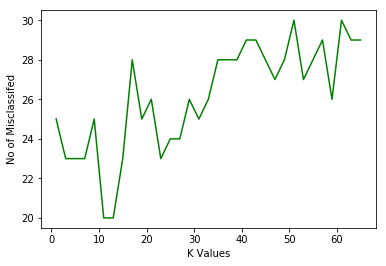

In [62]:
plt.plot(k, mis_list, color = 'green')
plt.xlabel("K Values")
plt.ylabel("No of Misclassifed")
plt.show()

In [63]:
knn = KNeighborsClassifier(n_neighbors=11)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

## Accuracy of model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)

## Confussion Matrix
cm = confusion_matrix(y_test,y_pred)
cm


Accuracy: 69.6969696969697


array([[26,  5],
       [15, 20]], dtype=int64)

In [64]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
print(y_pred)

## Accuracy of model
print("accuracy (in %)", metrics.accuracy_score(y_test, y_pred) * 100 )

## Confussion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

[1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.]
accuracy (in %) 83.33333333333334


array([[27,  4],
       [ 7, 28]], dtype=int64)

## Considering age and income column and preparing the data to model

In [65]:
df_final.head()

,pca1,id,age,sex,region,income,married,children,car,save_act,...,pl,children_yn,sex_encoded,married_encoded,car_encoded,saving_encoded,current_encoded,mortgage_encoded,pl_encoded,region_encoded
0,-9707.212463,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,...,YES,YES,1,0,0,0,0,0,1,0
1,2831.876570,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,...,NO,YES,0,1,1,0,1,1,0,3
2,-10677.809637,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,...,NO,NO,1,1,1,1,1,0,0,0
3,-6877.834199,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,...,NO,YES,1,1,0,0,1,0,0,3
4,23323.083622,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,...,NO,NO,1,1,0,1,0,0,0,1


In [66]:
df_final.columns

Index(['pca1', 'id', 'age', 'sex', 'region', 'income', 'married', 'children',
       'car', 'save_act', 'current_act', 'mortgage', 'pl', 'children_yn',
       'sex_encoded', 'married_encoded', 'car_encoded', 'saving_encoded',
       'current_encoded', 'mortgage_encoded', 'pl_encoded', 'region_encoded'],
      dtype='object')

In [67]:
ls = ['age','sex_encoded','region_encoded','income','married_encoded','children','car_encoded','saving_encoded',
      'current_encoded','mortgage_encoded','pl_encoded']
df = df_final[ls]
df.head()

,age,sex_encoded,region_encoded,income,married_encoded,children,car_encoded,saving_encoded,current_encoded,mortgage_encoded,pl_encoded
0,48,1,0,17546.0,0,1,0,0,0,0,1
1,40,0,3,30085.1,1,3,1,0,1,1,0
2,51,1,0,16575.4,1,0,1,1,1,0,0
3,23,1,3,20375.4,1,3,0,0,1,0,0
4,57,1,1,50576.3,1,0,0,1,0,0,0


In [68]:
df_with = df.copy()
scaler = MinMaxScaler()
ls = list()
for column in df.columns:
    x = df[[column]].values.astype(float)
    x_scaler = scaler.fit_transform(x)
    name = column+'1'
    df_with[name] = x_scaler

In [69]:
df_with.columns

Index(['age', 'sex_encoded', 'region_encoded', 'income', 'married_encoded',
       'children', 'car_encoded', 'saving_encoded', 'current_encoded',
       'mortgage_encoded', 'pl_encoded', 'age1', 'sex_encoded1',
       'region_encoded1', 'income1', 'married_encoded1', 'children1',
       'car_encoded1', 'saving_encoded1', 'current_encoded1',
       'mortgage_encoded1', 'pl_encoded1'],
      dtype='object')

In [70]:
ls = ['age1', 'sex_encoded1','region_encoded1','income1','married_encoded1','children1','car_encoded1',
      'saving_encoded1', 'current_encoded1','mortgage_encoded1', 'pl_encoded1']
df_with = df_with[ls]
df_with.head()

,age1,sex_encoded1,region_encoded1,income1,married_encoded1,children1,car_encoded1,saving_encoded1,current_encoded1,mortgage_encoded1,pl_encoded1
0,0.612245,1.0,0.000000,0.215634,0.0,0.333333,0.0,0.0,0.0,0.0,1.0
1,0.448980,0.0,1.000000,0.431395,1.0,1.000000,1.0,0.0,1.0,1.0,0.0
2,0.673469,1.0,0.000000,0.198933,1.0,0.000000,1.0,1.0,1.0,0.0,0.0
3,0.102041,1.0,1.000000,0.264320,1.0,1.000000,0.0,0.0,1.0,0.0,0.0
4,0.795918,1.0,0.333333,0.783987,1.0,0.000000,0.0,1.0,0.0,0.0,0.0


## Considering Age column and build the model

In [71]:
data3 = df_with[df_with.columns.difference(['income1'])]
data3.head()

,age1,car_encoded1,children1,current_encoded1,married_encoded1,mortgage_encoded1,pl_encoded1,region_encoded1,saving_encoded1,sex_encoded1
0,0.612245,0.0,0.333333,0.0,0.0,0.0,1.0,0.000000,0.0,1.0
1,0.448980,1.0,1.000000,1.0,1.0,1.0,0.0,1.000000,0.0,0.0
2,0.673469,1.0,0.000000,1.0,1.0,0.0,0.0,0.000000,1.0,1.0
3,0.102041,0.0,1.000000,1.0,1.0,0.0,0.0,1.000000,0.0,1.0
4,0.795918,0.0,0.000000,0.0,1.0,0.0,0.0,0.333333,1.0,1.0


In [72]:
X = data3[data3.columns.difference(['pl_encoded1'])]
X.head()

,age1,car_encoded1,children1,current_encoded1,married_encoded1,mortgage_encoded1,region_encoded1,saving_encoded1,sex_encoded1
0,0.612245,0.0,0.333333,0.0,0.0,0.0,0.000000,0.0,1.0
1,0.448980,1.0,1.000000,1.0,1.0,1.0,1.000000,0.0,0.0
2,0.673469,1.0,0.000000,1.0,1.0,0.0,0.000000,1.0,1.0
3,0.102041,0.0,1.000000,1.0,1.0,0.0,1.000000,0.0,1.0
4,0.795918,0.0,0.000000,0.0,1.0,0.0,0.333333,1.0,1.0


In [73]:
X = data3[data3.columns.difference(['pl_encoded1'])]
X.head()

,age1,car_encoded1,children1,current_encoded1,married_encoded1,mortgage_encoded1,region_encoded1,saving_encoded1,sex_encoded1
0,0.612245,0.0,0.333333,0.0,0.0,0.0,0.000000,0.0,1.0
1,0.448980,1.0,1.000000,1.0,1.0,1.0,1.000000,0.0,0.0
2,0.673469,1.0,0.000000,1.0,1.0,0.0,0.000000,1.0,1.0
3,0.102041,0.0,1.000000,1.0,1.0,0.0,1.000000,0.0,1.0
4,0.795918,0.0,0.000000,0.0,1.0,0.0,0.333333,1.0,1.0


In [74]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((264, 9), (66, 9), (264, 1), (66, 1))

## Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print(y_pred)

## Accuracy of model
print("Logistic regression score = ", lr.score(x_test, y_test))

## Confussion Matrix
cm=confusion_matrix(y_test,y_pred)
print("\n Confusion Matrix is:", cm, sep='\n')

[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
Logistic regression score =  0.5454545454545454

 Confusion Matrix is:
[[25  6]
 [24 11]]


## Building the KNN on normalizated data

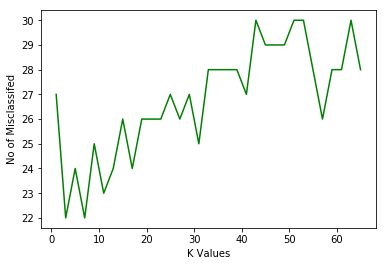

{1: 27, 3: 22, 5: 24, 7: 22, 9: 25, 11: 23, 13: 24, 15: 26, 17: 24, 19: 26, 21: 26, 23: 26, 25: 27, 27: 26, 29: 27, 31: 25, 33: 28, 35: 28, 37: 28, 39: 28, 41: 27, 43: 30, 45: 29, 47: 29, 49: 29, 51: 30, 53: 30, 55: 28, 57: 26, 59: 28, 61: 28, 63: 30, 65: 28}


In [76]:
from sklearn.neighbors import KNeighborsClassifier
## Finding the k value by ploting the graph

k = list(range(1,len(x_test),2))
mis_list = []
dist = {}

for i in k:
    vary_knn = KNeighborsClassifier(n_neighbors=i)
    vary_knn.fit(x_train,y_train)
    
    misclassifer = int(len(x_test) - (vary_knn.score(x_test,y_test)* len(x_test)))
    
    mis_list.append(misclassifer)
    dist[i] = misclassifer
    
plt.plot(k, mis_list, color = 'green')
plt.xlabel("K Values")
plt.ylabel("No of Misclassifed")
plt.show()

print(dist)

In [77]:
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

## Accuracy of model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)

## Confussion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

Accuracy: 66.66666666666666


array([[23,  8],
       [14, 21]], dtype=int64)

In [78]:
knn = KNeighborsClassifier(n_neighbors=11)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

## Accuracy of model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)

## Confussion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

Accuracy: 65.15151515151516


array([[22,  9],
       [14, 21]], dtype=int64)

## Using Decision Tree

In [79]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
print(y_pred)

## Accuracy of model
print("accuracy (in %)", metrics.accuracy_score(y_test, y_pred) * 100 )

## Confussion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

[1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0.]
accuracy (in %) 69.6969696969697


array([[22,  9],
       [11, 24]], dtype=int64)

## Considering income column and build the mode

In [80]:
data4 = df_with[df_with.columns.difference(['age1'])]
data4.head()

,car_encoded1,children1,current_encoded1,income1,married_encoded1,mortgage_encoded1,pl_encoded1,region_encoded1,saving_encoded1,sex_encoded1
0,0.0,0.333333,0.0,0.215634,0.0,0.0,1.0,0.000000,0.0,1.0
1,1.0,1.000000,1.0,0.431395,1.0,1.0,0.0,1.000000,0.0,0.0
2,1.0,0.000000,1.0,0.198933,1.0,0.0,0.0,0.000000,1.0,1.0
3,0.0,1.000000,1.0,0.264320,1.0,0.0,0.0,1.000000,0.0,1.0
4,0.0,0.000000,0.0,0.783987,1.0,0.0,0.0,0.333333,1.0,1.0


In [81]:
X = data4[data4.columns.difference(['pl_encoded1'])]
X.head()

,car_encoded1,children1,current_encoded1,income1,married_encoded1,mortgage_encoded1,region_encoded1,saving_encoded1,sex_encoded1
0,0.0,0.333333,0.0,0.215634,0.0,0.0,0.000000,0.0,1.0
1,1.0,1.000000,1.0,0.431395,1.0,1.0,1.000000,0.0,0.0
2,1.0,0.000000,1.0,0.198933,1.0,0.0,0.000000,1.0,1.0
3,0.0,1.000000,1.0,0.264320,1.0,0.0,1.000000,0.0,1.0
4,0.0,0.000000,0.0,0.783987,1.0,0.0,0.333333,1.0,1.0


In [82]:
Y = data4[['pl_encoded1']]
Y.head()

,pl_encoded1
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0


In [83]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((264, 9), (66, 9), (264, 1), (66, 1))

In [84]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print(y_pred)

## Accuracy of model
print("Logistic regression score = ", lr.score(x_test, y_test))

## Confussion Matrix
cm=confusion_matrix(y_test,y_pred)
print("\n Confusion Matrix is:", cm, sep='\n')

[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Logistic regression score =  0.5454545454545454

 Confusion Matrix is:
[[28  3]
 [27  8]]


In [85]:
#Using Naive Bayes (Bernoulli)
from sklearn.naive_bayes import BernoulliNB

bnb=BernoulliNB()

bnb.fit(x_train, y_train)

# making predictions on the testing set 
y_pred = bnb.predict(x_test)
print(y_pred)

## Accuracy of model
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)

## Confussion Matrix
cm=confusion_matrix(y_test,y_pred)
cm

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
Accuracy:  43.93939393939394


array([[23,  8],
       [29,  6]], dtype=int64)

In [86]:
# Using Decision Tree
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
print(y_pred)

## Accuracy of model
print("accuracy (in %)", metrics.accuracy_score(y_test, y_pred) * 100 )

## Confussion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

[1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.]
accuracy (in %) 80.3030303030303


array([[26,  5],
       [ 8, 27]], dtype=int64)

## using PCA or using only income column ,we can get the highest accuracy.